## 0.0 Introduction

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa.

Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

Tanzania’s tourist attractions include the Serengeti plains, which hosts the largest terrestrial mammal migration in the world; the Ngorongoro Crater, the world’s largest intact volcanic caldera and home to the highest density of big game in Africa; Kilimanjaro, Africa’s highest mountain; and the Mafia Island marine park; among many others. The scenery, topography, rich culture and very friendly people provide for excellent cultural tourism, beach holidays, honeymooning, game hunting, historical and archaeological ventures – and certainly the best wildlife photography safaris in the world.

The objective of this project is to develop a machine learning model that can classify the range of expenditures a tourist spends in Tanzania. The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.

## 1.0  IMPORTING NECESSARY LIBRARIES

In [65]:

#import necessary libraries
import os
import sys
import time
import requests
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
#data analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#class imbalance libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
#machine learning libraries

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


#machine learnin evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

## 2.0 Loading our datasets and getting to understand it

In [4]:
#import the data
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')


                                                    DATA EXPLORATION

In [5]:

Train.shape, Test.shape

((4809, 23), (1601, 22))

In [6]:

#check the first few rows of the data
Train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [7]:
Test.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [8]:
Train.describe()


,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [9]:

Test.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


# 2.1 Insights from basic data analysis

Our dataset has a combined 6410 rows 

Train data comprising 4809 rows and 23  columns.

Test data comprising 1601 rows and 22  columns.

>Total cost is missing in our test data since its the target variable.

We have missing data in  both data sets.

## 2.2 Preliminary Pre-processing

In [ ]:

# For Train dataset
missing_values_train = Train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print("Missing values in Train dataset:")
print(missing_values_train)

# For Test dataset
missing_values_test = Test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("\nMissing values in Test dataset:")
print(missing_values_test)


## 2.3 MISSING VALUES

The numbers represent the count of missing values in each column.

>There are 327 missing values in the travel_with column, 111 missing values in the most_impressing column and total tourists are 3 in Test data.

Train data
>travel with has 1114 ,female 3 and male 5 and 313 in most impressing.

#Some of reaons we need to handle missing values:
 1. Prevents Biased Results: 

            If missing values are not handled properly, they can bias the model towards the most common class or category, leading to incorrect predictions.

2. Improves Model Performance:

          Missing values can introduce noise and reduce the quality of predictions. By handling missing values effectively, you can improve the performance of the model.

3. Maintains Data Integrity:

          Missing values can lead to errors in data analysis and interpretation. Handling missing values ensures that the data used for analysis is complete and accurate. 

4. Avoids Data Loss:

         Simply removing rows or columns with missing values can result in significant loss of data, especially if the missing values are spread across multiple columns. Handling missing values allows you to retain more data and make better use of available information.

In [11]:
#we want to differentiate the numerical and categorical columns
categorical_columns = Train.select_dtypes(include=['object']).columns.tolist()
numerical_columns = Train._get_numeric_data().columns.tolist()
print(categorical_columns)
print(numerical_columns)

['ID', 'country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz', 'most_impressing']
['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']


## 2.4 lets check our data type
we observe that we have 18 categorical columns.(object)

we also have 5 numerical columns(float)

>we wanna manually check on numerical to fully ascertain .

Which when we check we ascertain to be true.

>Tf and Tm counts members present based on gender.

>night Zanzibar and night mainland counts nights spents on the locations.

>total cost amounts amount spent during the whole tourism activity.

## 2.5 lets try and understand our target variable (Total Cost)

In [12]:

#mean of total cost
Train['total_cost'].mean()


8114388.777617799

In [13]:

# Count of countries above the mean total cost
country_count_above_mean = len(Train[Train['total_cost'] > Train['total_cost'].mean()]['country'].unique())

print(country_count_above_mean)


69


In [14]:

print(min(Train['total_cost']))
print(max(Train['total_cost']))
print(Train['total_cost'].mean())

49000.0
99532875.0
8114388.777617799


In [18]:

#median of total cost
Train['total_cost'].median()

3397875.0

## Insights we can deduce using mean and median

-We have 69 out of 118 countries spending above mean

-They is a huge disparity between the highest tourist expenditure at tshs 995322875 and lowest at 49000.
the data hence will be a two long tailed around the mean.

Median is lower than mean

this clearly means total cost is positively skewed distribution

The tail of the distribution will be  extended towards the higher values.
Most of the data points are concentrated on the lower end, with fewer extreme values on the higher end.
Given that the mean is higher than the median, and the data ranges from a relatively low value (49,000) to a significantly high value (99,000,000), it indicates a positively skewed distribution. This type of distribution is common in these scenarios like expenditure distribution, where a few individuals earn very high incomes, resulting in a longer tail on the higher end of the distribution.
  


## 3.0 EDA
To Note


Kernel Density Estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. It provides a smooth estimate of the underlying probability density function of a continuous random variable based on a set of observed data points. 

`sns.kdeplot()` from the Seaborn library is used to create KDE plots for each numerical variable in the Train dataset. These plots visualize the distribution of each variable by showing the shape of the estimated probability density function, allowing for insights into the data's central tendency, spread, and skewness.

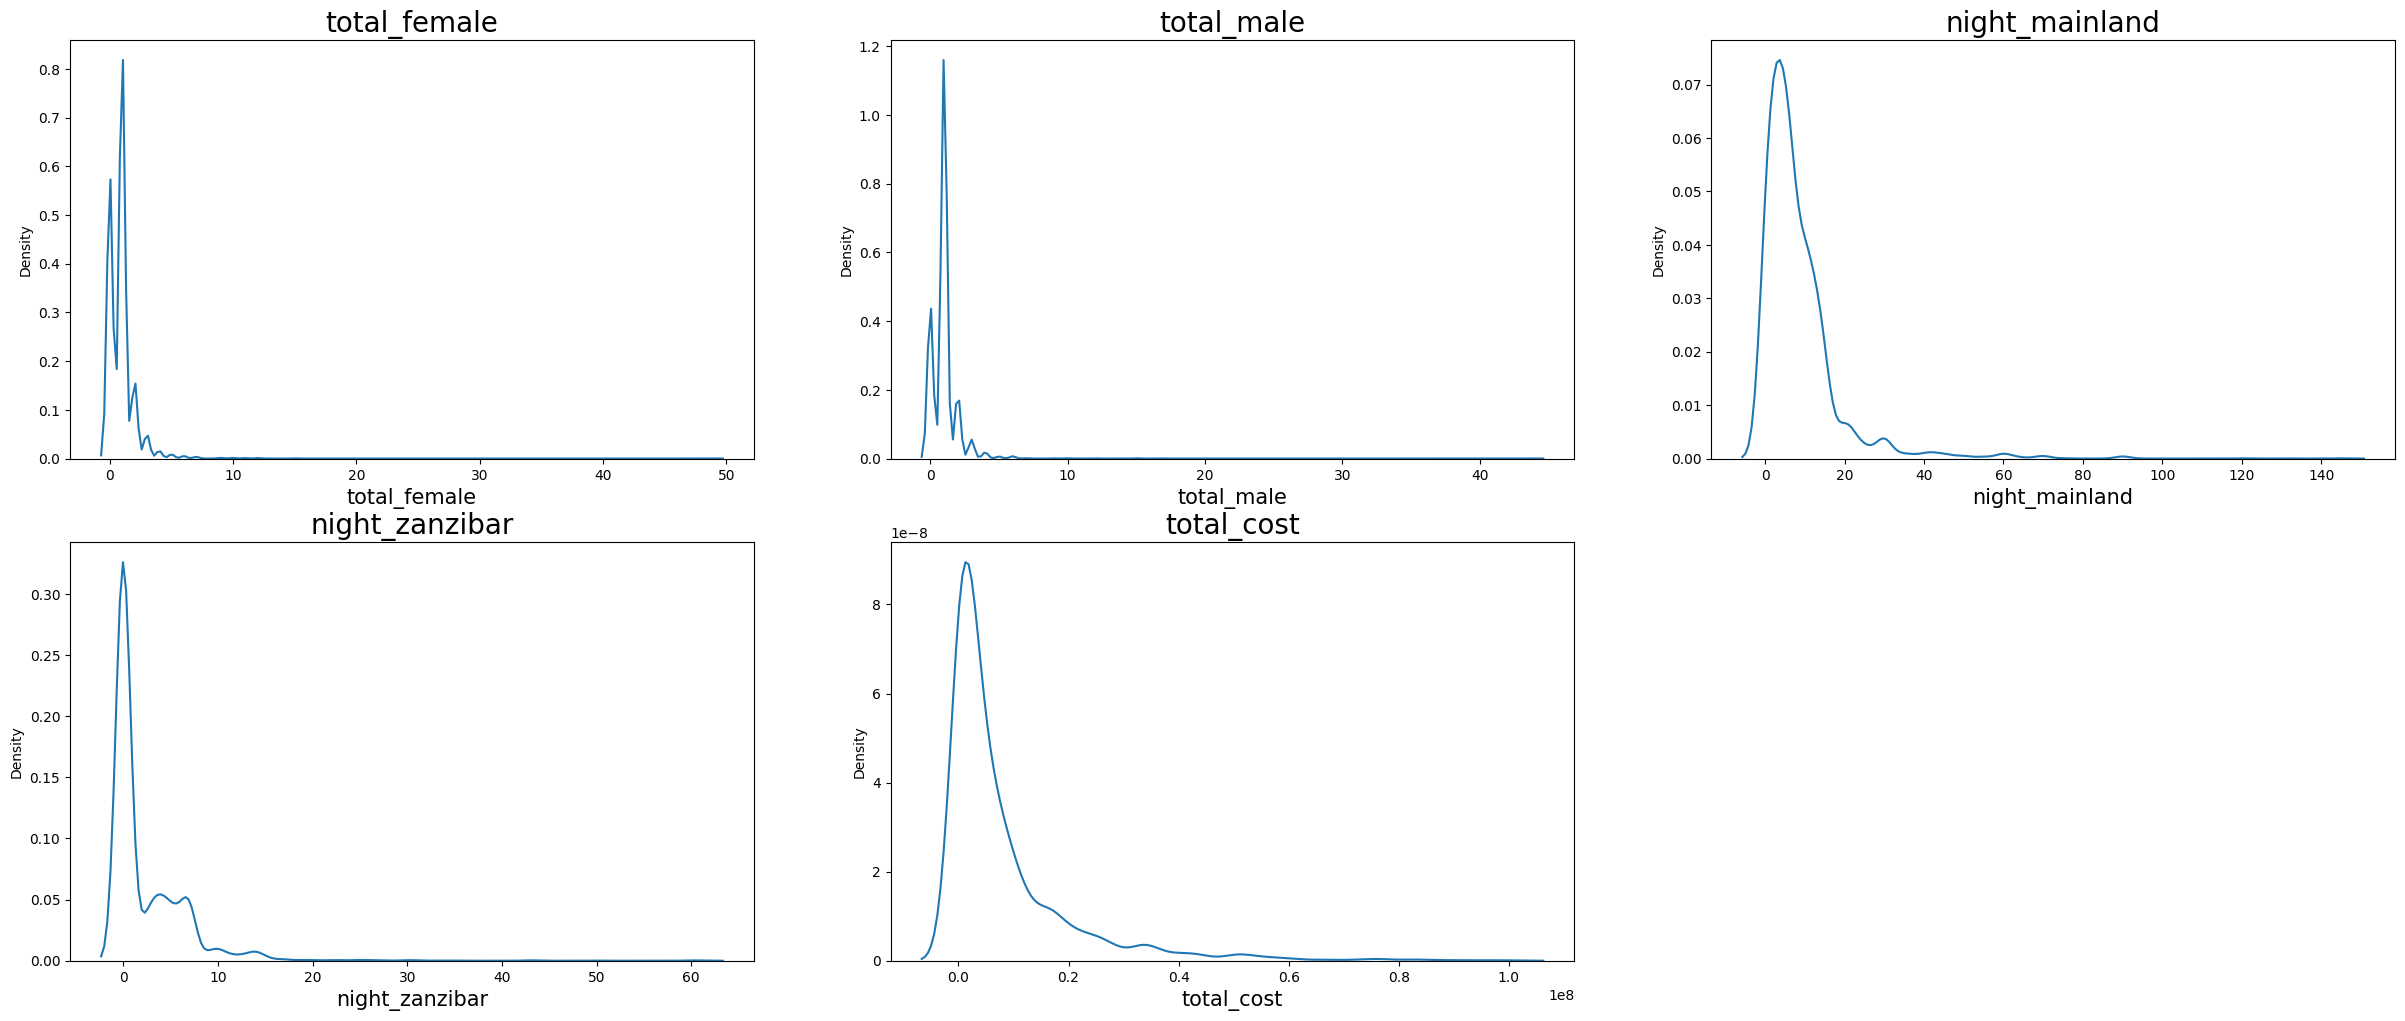

In [16]:

#Univariate Data Analysis (Kernel Density Estimate) for the numerical variables in the Train dataset
num_var=Train.select_dtypes(include=['int64', 'float64']).columns
fig=plt.figure(figsize=(30, 25))
for i in range(len(num_var)):
    ax=fig.add_subplot(4, 3, i+1)
    sns.kdeplot(Train[num_var[i]], ax=ax)
    ax.set_title(num_var[i], fontsize=20)
    plt.xlabel(num_var[i], fontsize=15)





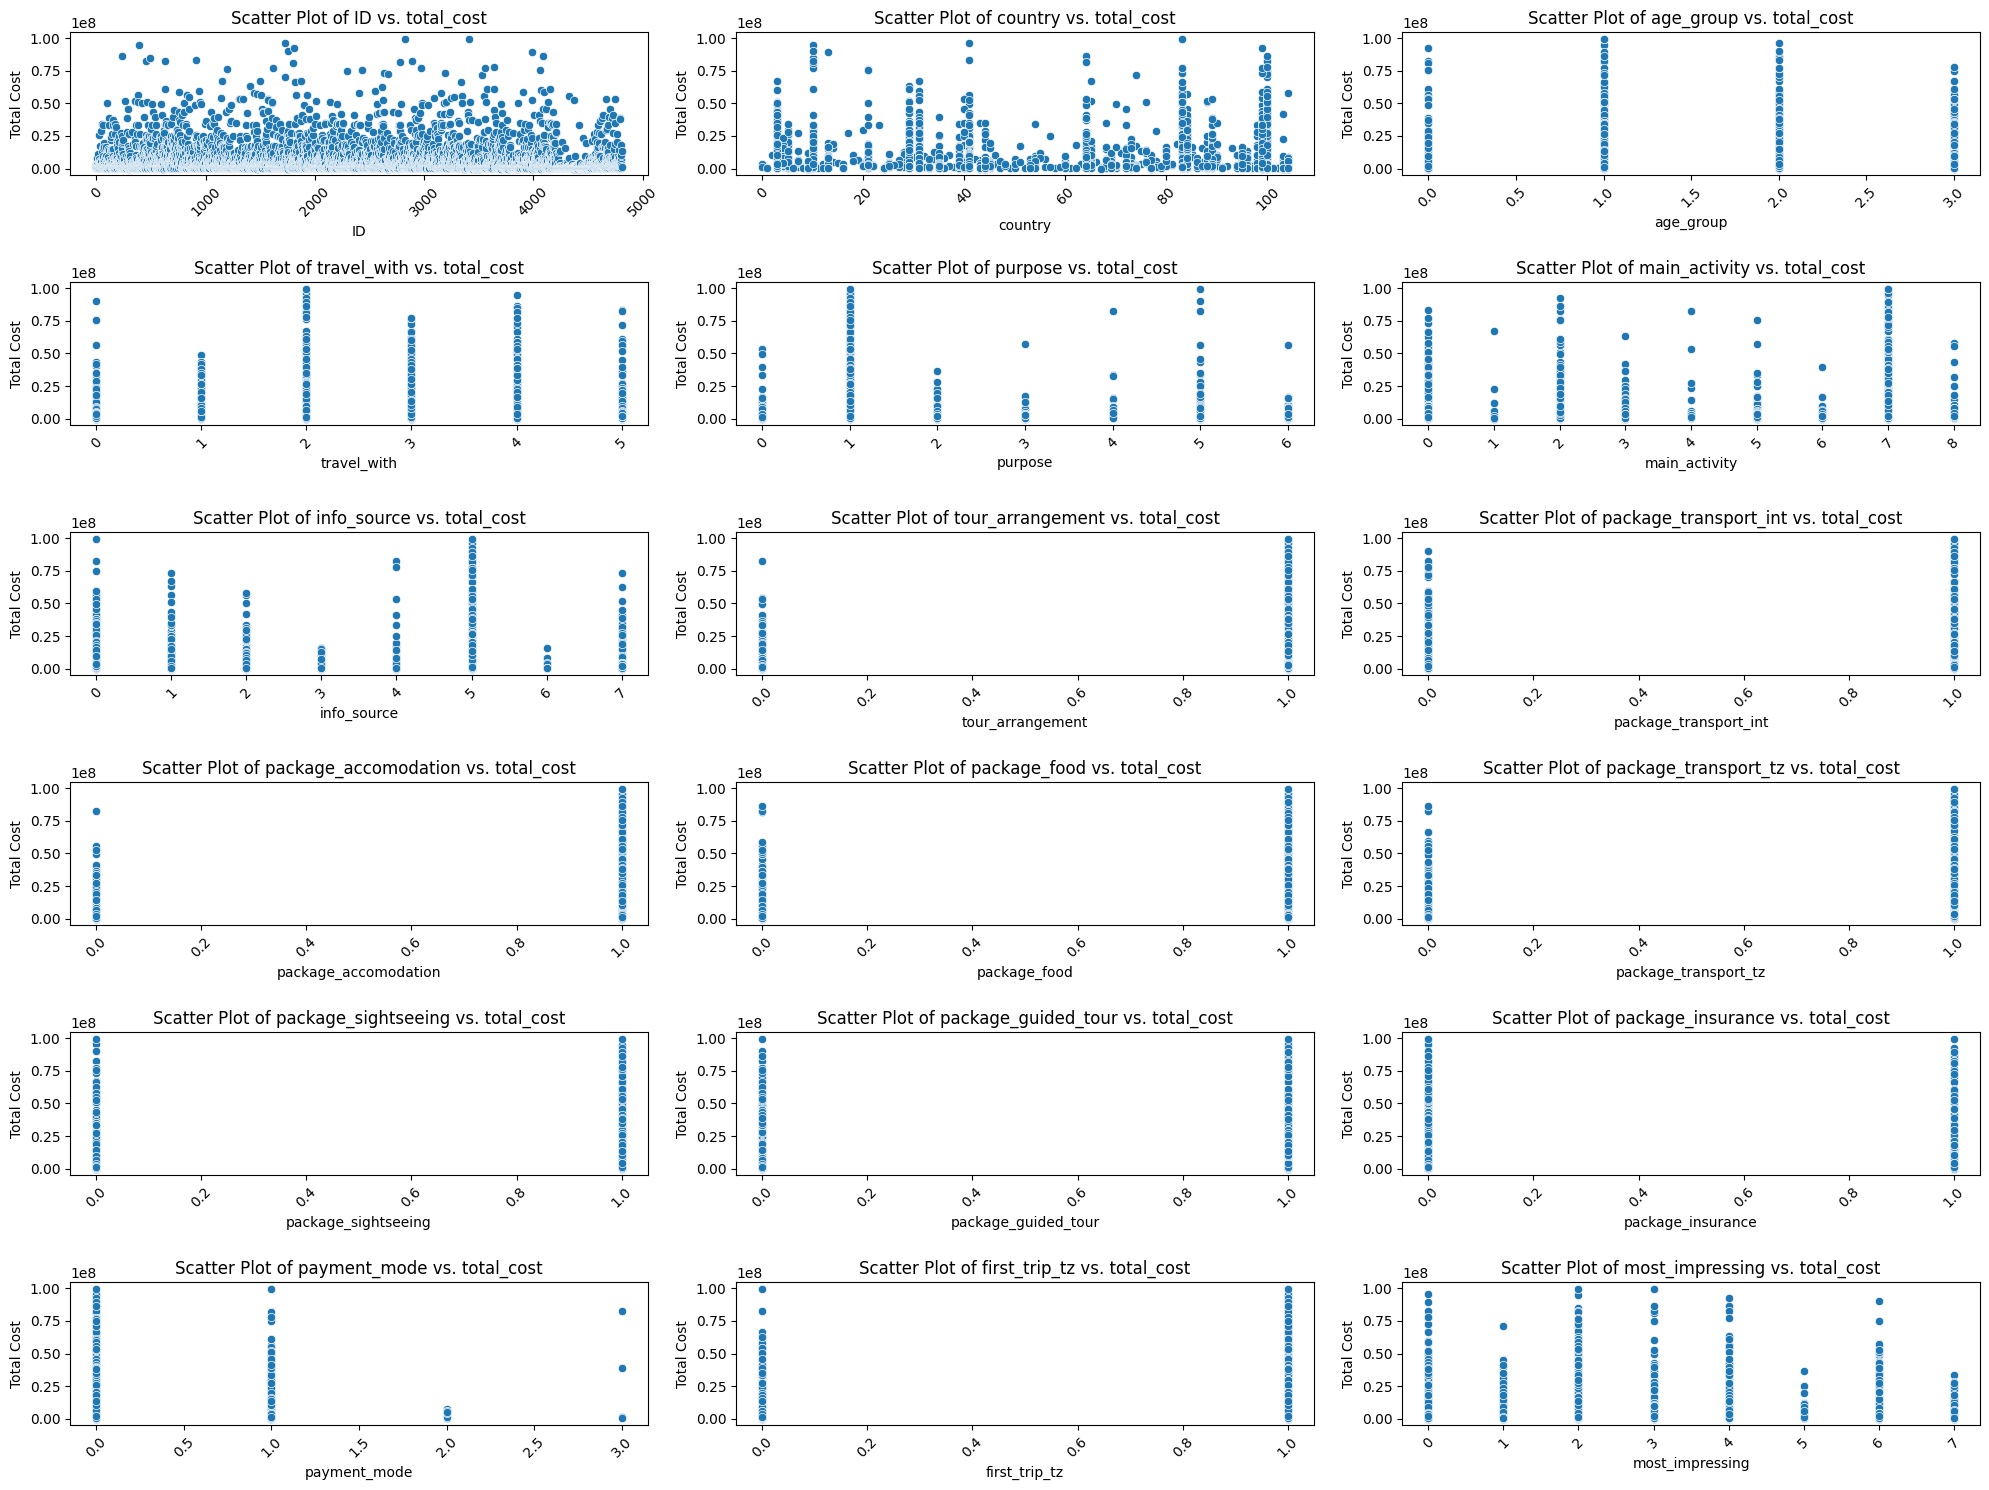

In [19]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Copying Train DataFrame to avoid modifying the original data
train_encoded = Train

# Encoding categorical variables
for var in categorical_columns:
    train_encoded[var] = label_encoder.fit_transform(train_encoded[var])

# Determine the number of rows and columns for subplots
num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

# Plot scatter plots for each categorical variable against 'total_cost' on a single page
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=train_encoded, x=var, y='total_cost', palette='pastel')
    plt.title(f'Scatter Plot of {var} vs. total_cost')
    plt.xlabel(var)
    plt.ylabel('Total Cost')
    plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



## insights from data

Numerical data

the density of the data is concentrated on the left(beginning) meaning  most tourists spent below
 average or around average in total costs and vacation stay.

 Categorical data

some columns seem to have almost similar and identical data ie

1. Touur arrangement
2. Accomodation.
3. and first trip to Tanzania.

also 

4. Sightseeing.
5. guarded tour.
6. insurance package have similar or most of its data is identical.

these insights will be crucial when deciding on data to use on our machine learning and we can also use data from these columns to fill misssing values on other identical columns.

## 4.0 DATA PREPARATION

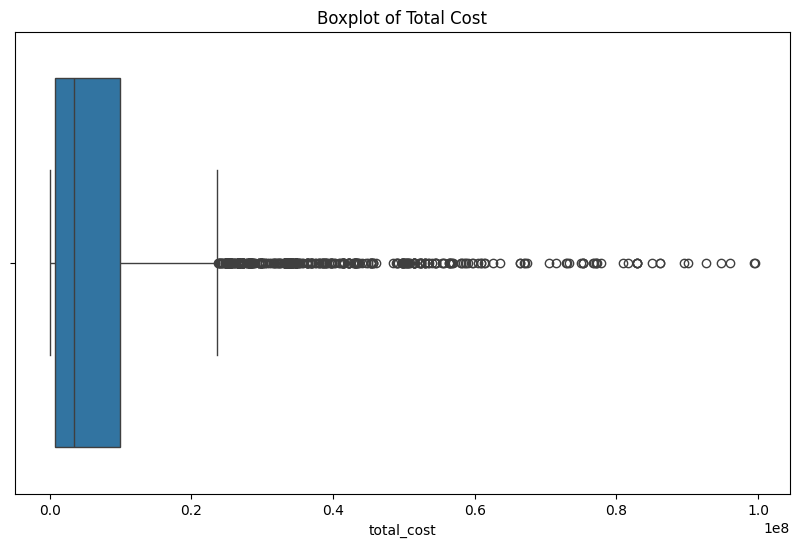

In [20]:

#outliers
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=Train, x='total_cost', ax=ax)
plt.title('Boxplot of Total Cost')
plt.show()

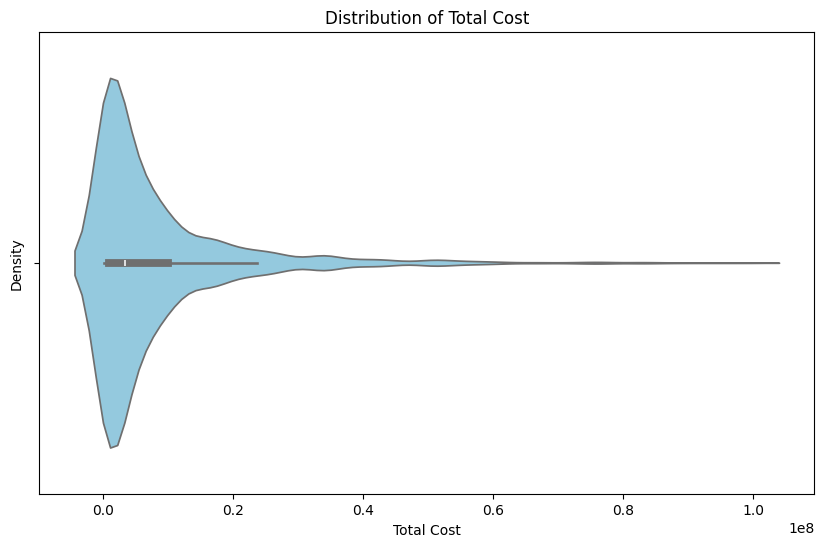

In [21]:


# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='total_cost', data=Train, color='skyblue')

# Add title and labels
plt.title('Distribution of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Density')

# Show plot
plt.show()


## 4.1 How to handle the Outliers and missing Values in our variables

our target variable (total cost) has outliers.

alot of data is skewd to the left ,followed by a considerable data concentrated on the central part.

there is also some margins of data skewd to the right.

>Should we drop or alter the outliers ?

NO,the data represents the real and rawness of differences on worlgd per capita incomes.

Countries with higher per capita incomes will spend more on tourism expenditure and stay longer on vocations.
Remember some of this are fully paid by their employers and have disposable income hence altering this data will lead to loss of very important and key data when organising and planning to receive tourists.

We might consider usin SVM ,Random Forest  logistic regression



#DATA PREPROCESSING.


#
Missing Values data preprocessing;

1.'travel_with':

> This is a categorical variable indicating who the tourist is traveling with
 we can replace missing values with a new category such as 'Unknown'
 to retain the information that the data is missing.

2.'total_female' and 'total_male':

> These variables represent counts of females and males in the tourist group.
 Since the number of missing values is small compared to the total dataset size,
 we can impute the missing values with the median of each respective column.

3.'most_impressing':

> This column represents what impressed the tourist the most during the trip.
 We can replace missing values with a new category like 'Not specified'
 to retain the information that data is missing.

4.'total_cost':

> This is our target variable. Rows with missing 'total_cost' cannot be used for training our model.
 Therefore, we will need to remove these rows from the training dataset.

In [ ]:

# Step 1: Handling missing values in 'travel_with', 'total_female', 'total_male', and 'most_impressing'
#Train['travel_with'].fillna('Unknown', inplace=True)
Train['total_female'].fillna(Train['total_female'].median(), inplace=True)
Train['total_male'].fillna(Train['total_male'].median(), inplace=True)
Train['most_impressing'].fillna('Not specified', inplace=True)

# Step 2: Removing rows with missing 'total_cost' (target variable)
#T#rain.dropna(subset=['total_cost'], inplace=True)

# Check if missing values are handled
#print("Missing values in the training dataset after handling:")
print(Train.isnull().sum())


In [ ]:

#check for missing values
Test.isnull().sum()

In [ ]:

# Step 1: Handling missing values in 'travel_with', 'total_female', 'total_male', and 'most_impressing' in the test set
#Test['travel_with'].fillna('Unknown', inplace=True)
Test['total_female'].fillna(Test['total_female'].median(), inplace=True)
Test['total_male'].fillna(Test['total_male'].median(), inplace=True)
Test['most_impressing'].fillna('Not specified', inplace=True)
Test['travel_with'].fillna('Not specified', inplace=True)
# Check if missing values are handled in the test set
print("Missing values in the test dataset after handling:")
print(Test.isnull().sum())



# Our new data is free of any missing values

In [32]:

Train.describe()#summary statistics of the data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,...,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,2404.000000,65.924517,1.287170,2.497193,0.926804,1.009565,1.702849,4.546891,3.009357,0.465585,...,0.393013,0.309836,0.322312,0.151799,8.488043,2.304429,0.137035,0.674361,2.663340,8.114389e+06
std,1388.383052,34.403043,0.769426,1.854538,1.287841,1.138273,1.674437,2.876177,2.585098,0.498866,...,0.488470,0.462474,0.467410,0.358863,10.427624,4.227080,0.361032,0.468662,2.132271,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,1202.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,8.121750e+05
50%,2404.000000,83.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,2.000000,3.397875e+06
75%,3606.000000,99.000000,2.000000,4.000000,1.000000,1.000000,2.000000,7.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,11.000000,4.000000,0.000000,1.000000,4.000000,9.945000e+06
max,4808.000000,104.000000,3.000000,5.000000,49.000000,44.000000,6.000000,8.000000,7.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,145.000000,61.000000,3.000000,1.000000,7.000000,9.953288e+07


In [33]:

# Check for unique values in the 'country' column
Train['country'].nunique()


105

we have tourist from 105 countries.

>we ascertain country is a key variable in our dataset as expenditure will
 be not linearly distributed due to different purchasing power amongst different visitors.
 

## 4.2 one hot encoding

Maintains Independence: One-hot encoding preserves the independence of categorical variables. Each category is represented by its own binary feature, ensuring that no ordinal relationship is assumed between categories.

In [40]:




# Define the threshold for low cardinality
threshold = 10  # For example, you can start with a threshold of 10

# Identify categorical columns with low cardinality
low_cardinality_cols = [col for col in Train.columns if Train[col].nunique() < threshold]

# Initialize one-hot encoder with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit one-hot encoder on the training data
one_hot_encoder.fit(Train[low_cardinality_cols])


OneHotEncoder(drop='first', handle_unknown='ignore')

In [ ]:

# Initialize one-hot encoder with handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

# Fit one-hot encoder on the training data
one_hot_encoder.fit(Train[low_cardinality_cols])

# Transform both training and test data
one_hot_encoded_cols_train = pd.DataFrame(one_hot_encoder.transform(Train[low_cardinality_cols]).toarray())
#one_hot_encoded_cols_test = pd.DataFrame(one_hot_encoder.transform(Test[low_cardinality_cols]).toarray())

# Get the column names for one-hot encoded features
one_hot_encoded_feature_names = one_hot_encoder.get_feature_names_out(low_cardinality_cols)

# Assign column names to the one-hot encoded dataframes
one_hot_encoded_cols_train.columns = one_hot_encoded_feature_names
#one_hot_encoded_cols_test.columns = one_hot_encoded_feature_names

# Drop original categorical columns from both training and test data
Train.drop(columns=low_cardinality_cols, inplace=True)
#Test.drop(columns=low_cardinality_cols, inplace=True)

# Concatenate one-hot encoded columns with the respective datasets
Train = pd.concat([Train, one_hot_encoded_cols_train], axis=1)
#Test = pd.concat([Test, one_hot_encoded_cols_test], axis=1)

# Check the updated datasets
print("Updated training dataset:")
print(Train.head())
#print("\nUpdated test dataset:")
#print(Test.head())



#MORE INSIGHTS ONE-HOT ENCODER.

OneHotEncoder used to encode categorical variables into numerical values. This encoder is commonly used in machine learning pipelines to handle categorical data, which are variables that can take on one of a limited, and usually fixed, number of possible values.

Here's how OneHotEncoder typically works:

Input: It takes categorical variables as input. These variables could be countries, age groups, travel companions, payment modes, or impressions as is in dataset.

Encoding: For each categorical variable, OneHotEncoder creates a new binary column for each category in that variable. For example, if the variable is "country" and there are unique countries: "Australia", "Canada", and "Germany", it will create three binary columns: "country_Australia", "country_Canada", and "country_Germany".

Binary Representation: In each binary column, it assigns a value of 1 if the observation falls into that category, and 0 otherwise. This binary representation helps machine learning algorithms effectively understand and utilize categorical data.

Handle Unknown Categories: Optionally, OneHotEncoder can be configured to handle unknown categories that might appear in the test set but not in the training set. It can either ignore them or raise an error, depending on the configuration.

Drop First: Another option is to drop the first category for each feature. This is useful to avoid multicollinearity in linear models.

Output: The output of OneHotEncoder is a sparse matrix or an array of binary values representing the encoded categorical variables, which can then be used as input to machine learning models.



In [42]:

Train.shape

(4809, 55)

In [ ]:
#data types
Train.dtypes

In [ ]:
#columns in the data
Train.columns

Our categoreis have increased from 23 to 55 variables

## 5.0 Feature Engineering

## 5.1 dropping country column
As observed earlier country is an object  which will bring issues when modelling.

To address this we use unique country's median to represent the country and then drop the 'country' as a column and have new column 'country _median-total-cost as our new column

we use median instead of mean since our data seems to be largely spread out(outliers) but concentrated at a certain region.henc the middle figure is a better representative and a good candidate.

In [ ]:

train_data=Train
# Calculate mean total cost by country
country_median_total_cost = train_data.groupby('country')['total_cost'].median()

# Create a dictionary mapping country to mean total cost
country_to_median_total_cost = country_median_total_cost.to_dict()

# Replace country with mean total cost
train_data['country_median_total_cost'] = train_data['country'].map(country_to_median_total_cost)

# Drop the original 'country' column if needed
train_data.drop(columns=['country'], inplace=True)

# Now train_data contains a new column 'country_mean_total_cost' with the mean total cost for each country
print(train_data.head())

## 5.2 Label encoding

our id column contains both an object and a float.

our column is also ordinal starting with tour_id 0 to tour_id 4809.

we shall encode 'id'column to new column 'Id_encoded' which contains no string


In [ ]:

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder to the 'ID' column and transform the values
train_data['ID_encoded'] = label_encoder.fit_transform(train_data['ID'])

# Now train_data contains a new column 'ID_encoded' with ordinal numeric values based on the order of appearance in the 'ID' column
# You can drop the original 'ID' column if needed
train_data.drop(columns=['ID'], inplace=True)
print(train_data.head())



In [93]:

#Train.head()

In [94]:


train_data = Train

# Check the data types of each column
column_types = train_data.dtypes

# Identify columns with string data
string_columns = column_types[column_types == 'object'].index.tolist()

print("Columns with string data:", string_columns)



Columns with string data: []


## 5.4 conversion of int to float

'Id-encoded is still an integer and we have to convert to float 64 to match other columns

In [96]:


#X_train.columns = X_train.columns.astype(str)#


In [ ]:

##
# Convert int32 columns to float64
Train['ID_encoded'] = Train['ID_encoded'].astype('float64')  # Example conversion, replace 'ID_encoded' with other int32 column names as needed 



All our columns are now float64 .

we can proceed with model selection

## 6.0 MODEL SELECTION

In [97]:

# Load your dataset
train_data = Train
# Separate features and target variable
X = train_data.drop(columns=["total_cost"])
y = train_data["total_cost"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3847, 54) (962, 54) (3847,) (962,)


## 6.1 Cross-Validation

In [63]:


# Assuming X_train and y_train are your feature and target variables

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector': SVR(),
    'KNN': KNeighborsRegressor()
}

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=50, scoring='neg_mean_squared_error')  # Adjust cv for desired folds and scoring metric
    rmse_scores = np.sqrt(-scores)
    print(f"{name}: RMSE: {rmse_scores.mean():.4f}") #(+/- {rmse_scores.std() * 2:.4f})")



Linear Regression: RMSE: 9869448.8119
Decision Tree: RMSE: 13413890.3844
Random Forest: RMSE: 9515029.9195
Gradient Boosting: RMSE: 9412002.7715
Support Vector: RMSE: 12929493.7837
KNN: RMSE: 12054488.8197


## 6.2 RMSE

RMSE is a measure of the differences between predicted values and observed values.
 Lower RMSE values indicate better model performance, as they represent smaller errors
  between predicted and actual values.

Gradient Boosting and Random Forest have the lowest RMSE values, indicating better performance compared to other models.
Linear Regression has a relatively higher RMSE compared to tree-based models.
Decision Tree, SVM, and KNN have higher RMSE values compared to Gradient Boosting and Random Forest, suggesting they may not perform as well on this dataset.

In [66]:

# Iterate over models
for name, model in models.items():
    # Fit the model to get predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    # Calculate R-squared
    r2 = r2_score(y_train, y_pred)
    print(f"{name}: R-squared: {r2:.4f}")


Linear Regression: R-squared: 0.3539
Decision Tree: R-squared: 1.0000


Random Forest: R-squared: 0.9146
Gradient Boosting: R-squared: 0.5381
Support Vector: R-squared: -0.1521
KNN: R-squared: 0.3471


## 6.3  R2

R 2
measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values indicate better model performance, with 1.0 being the best possible.

Decision Tree:

Has a perfect score of 1.0, indicating that it perfectly fits the data. However, such a high 
may suggest overfitting.

Random Forest:

Also has a high score of 0.9146, indicating strong performance in explaining the variance in the data.

Gradient Boosting:

Has a moderate score of 0.5381, indicating moderate predictive power.

Linear Regression and KNN:

Have relatively lower scores, suggesting weaker performance in explaining the variance in the data.

Support Vector Machine (SVM):

Has a negative score, which is unusual and might indicate poor performance.

In summary, based on 
  values, Decision Tree and Random Forest appear to perform well, though the perfect 
  score of the Decision Tree might be a sign of overfitting. Gradient Boosting also shows moderate performance, while Linear Regression, SVM, and KNN exhibit weaker performance in explaining the variance in the data.

In [68]:

def adjusted_r2_score(y_true, y_pred, n_samples, n_predictors):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1)
    return adjusted_r2

# Iterate over models
for name, model in models.items():
    # Fit the model to get predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    # Calculate adjusted R-squared
    n_samples = len(y_train)
    n_predictors = X_train.shape[1]
    adjusted_r2 = adjusted_r2_score(y_train, y_pred, n_samples, n_predictors)
    print(f"{name}: Adjusted R-squared: {adjusted_r2:.4f}")


Linear Regression: Adjusted R-squared: 0.3447
Decision Tree: Adjusted R-squared: 1.0000
Random Forest: Adjusted R-squared: 0.9115
Gradient Boosting: Adjusted R-squared: 0.5315
Support Vector: Adjusted R-squared: -0.1685
KNN: Adjusted R-squared: 0.3378


## 6.4 Adjusted R2
Adjusted R2:

Takes into account the number of predictors in the model, penalizing models with more predictors. Higher adjusted R2
values indicate better model performance, with 1.0 being the best possible score.

Decision Tree :
has a perfect adjusted 
  score of 1.0, indicating a perfect fit to the data. However, as mentioned earlier, such a high score may suggest overfitting.

Random Forest:

Also has a high adjusted R2 score of 0.9115, indicating strong performance in explaining the variance in the data while considering the number of predictors.

Gradient Boosting:

Has a moderate adjusted score of 0.5315, indicating moderate predictive power while accounting for the number of predictors.

Linear Regression and KNN :

have relatively lower adjusted R2 scores, suggesting weaker performance in explaining the variance in the data after accounting for the number of predictors.

Support Vector Machine (SVM):

Has a negative adjusted R2 score, which is unusual and might indicate poor performance or inappropriate model fitting.

In summary, based on adjusted R2 values, Decision Tree and Random Forest appear to perform well, though the perfect adjusted R2 score of the Decision Tree might be a sign of overfitting. Gradient Boosting also shows moderate performance, while Linear Regression, SVM, and KNN exhibit weaker performance after considering the number of predictors.

In [71]:

from sklearn.metrics import mean_absolute_error


# Iterate over models
for name, model in models.items():
    # Fit the model to get predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    
    # Calculate MAE
    mae = mean_absolute_error(y_train, y_pred)
    print(f"{name}: Mean Absolute Error: {mae:.4f}")


Linear Regression: Mean Absolute Error: 5704717.2624
Decision Tree: Mean Absolute Error: 0.0000


Random Forest: Mean Absolute Error: 1945146.3379
Gradient Boosting: Mean Absolute Error: 4604872.1094
Support Vector: Mean Absolute Error: 7075971.6690
KNN: Mean Absolute Error: 6021154.5877


## 6.5 MAE

MAE :

measures the average magnitude of errors in predictions, without considering their direction. Lower MAE values indicate better model performance, as they represent smaller errors between predicted and actual values.


Decision Tree:

Has a MAE of 0.0000, indicating that it perfectly predicts the target variable in the training set. However, this could also indicate overfitting.

Random Forest:

Has the lowest MAE among the models, suggesting the smallest average error in predictions.

Gradient Boosting and Linear Regression :

have relatively higher MAE values compared to Random Forest, indicating larger errors in predictions.

Support Vector Machine (SVM) and KNN :

have the highest MAE values among the models, suggesting larger errors in predictions compared to other models.

In summary, based on the provided MAE values, Random Forest appears to have the best performance in terms of minimizing prediction errors, while Decision Tree shows perfect predictions on the training set, which could be a sign of overfitting.


## 7.0 MODEL TUNING

In [75]:

#Define the pipeline with polynomial features and regularization
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('reg', Ridge())  # You can replace Ridge with Lasso or try both
])

# Define the hyperparameters grid to search
param_grid = {
    'poly__degree': [1, 3],  # Try different degrees of polynomial features
    'reg__alpha': [1, 5, 10.0]  # Regularization parameter values
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'poly__degree': 1, 'reg__alpha': 10.0}
Best R-squared: 0.2966375657698158
Best Estimator: Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()), ('reg', Ridge(alpha=10.0))])


In [77]:
#from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with your code

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_estimator.predict(X_val)

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

# Calculate the number of predictors
num_predictors = X_val.shape[1]

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((len(y_val) - 1) / (len(y_val) - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.3366991424922846


In [78]:


# Define the parameter grid for tuning
param_grid = {
    'max_depth': [5, 15, 10, 25],
    'min_samples_split': [100, 50, 80],
    'min_samples_leaf': [24, 16, 20]
}

# Create the Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_regressor, param_grid, cv=20, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_r2 = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R-squared:", best_r2)
print("Best Estimator:", best_estimator)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 100}
Best R-squared: 0.31040744434295087
Best Estimator: DecisionTreeRegressor(max_depth=15, min_samples_leaf=20, min_samples_split=100,
                      random_state=42)


In [79]:

#from sklearn.metrics import r2_score
#import numpy as np

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_estimator.predict(X_val)

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

# Calculate the number of predictors
num_predictors = X_val.shape[1]

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((len(y_val) - 1) / (len(y_val) - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.32393540593149606


In [80]:


# Define the hyperparameters grid
param_grid = {
    'n_estimators': [250, 200, 150],
    'max_depth': [40, 30, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log3']
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best R-squared score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best R-squared: 0.3914841487844961
Best Estimator: RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=5,
                      n_estimators=200, random_state=42)


In [81]:

#from sklearn.metrics import r2_score
#import numpy as np

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_estimator.predict(X_val)

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

# Calculate the number of predictors
num_predictors = X_val.shape[1]

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((len(y_val) - 1) / (len(y_val) - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.38211309796536785


In [83]:
# Define the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 2, 1]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best R-squared
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best R-squared: 0.3758363711774785
Best Estimator: GradientBoostingRegressor(random_state=42)


In [84]:

#from sklearn.metrics import r2_score
#import numpy as np

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_estimator.predict(X_val)

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

# Calculate the number of predictors
num_predictors = X_val.shape[1]

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((len(y_val) - 1) / (len(y_val) - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.3758169496090321


In [ ]:

#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVR

# Define the SVM regressor
#svm_regressor = SVR()

# Define the hyperparameters grid
#param_grid = {
    #'kernel': ['linear', 'rbf', 'poly'],
    #'C': [0.1, 1, 10],
    #'gamma': ['scale', 'auto']
#}

# Perform Grid Search Cross Validation
#grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
#grid_search.fit(X_train, y_train)

# Print the best parameters and best R-squared
#print("Best Parameters:", grid_search.best_params_)
#print("Best R-squared:", grid_search.best_score_)
#print("Best Estimator:", grid_search.best_estimator_)


In [86]:


# Define the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best R-squared
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best R-squared: 0.07146900214992254
Best Estimator: KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')


In [87]:

#from sklearn.metrics import r2_score
#import numpy as np

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_estimator.predict(X_val)

# Calculate R-squared
r2 = r2_score(y_val, y_pred)

# Calculate the number of predictors
num_predictors = X_val.shape[1]

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((len(y_val) - 1) / (len(y_val) - num_predictors - 1))

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: -0.01810175677632886



CONCLUSION

Random forest performs better after tuning (0.382)

Gradient forest follows closely at o.375

Linear regression at 0.34

Decision tree at 0.32

KNN performs worst at negative 0.02




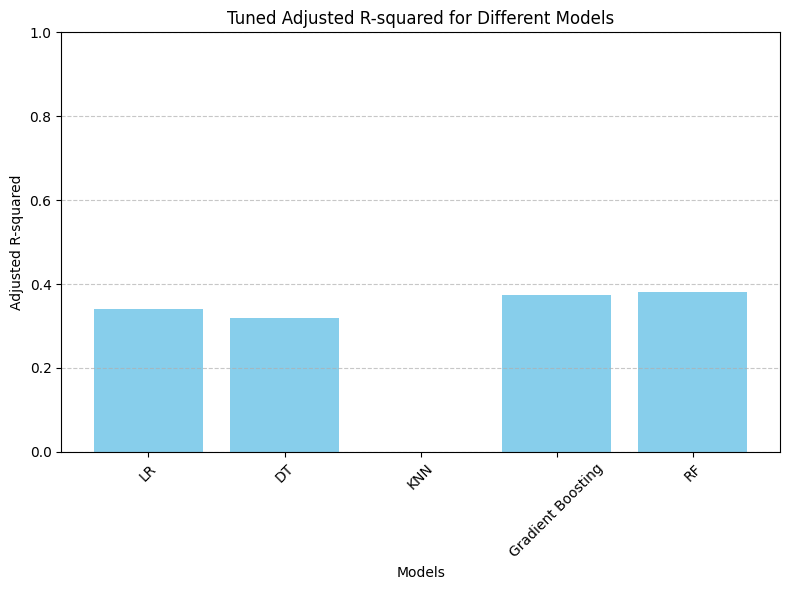

In [92]:

import matplotlib.pyplot as plt

# Adjusted R-squared values for different models (tuned)
adjusted_r2_values = [0.34, 0.32, -0.02, 0.375,0.382]  # Replace with your adjusted R-squared values
models = ['LR', 'DT', 'KNN', 'Gradient Boosting','RF']  # Replace with your model names

# Plot the adjusted R-squared values
plt.figure(figsize=(8, 6))
plt.bar(models, adjusted_r2_values, color='skyblue')
plt.title('Tuned Adjusted R-squared for Different Models')
plt.xlabel('Models')
plt.ylabel('Adjusted R-squared')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()
